In [1]:
using ColoringNames
using JLD
using MLLabelUtils
using MLDataPattern
using Plots
using DataFrames

In [2]:
full64_param_path = "../models/good/1706031148_sib0.5/params.jld"
full64_params = load(full64_param_path)
full64_mdl = restore(TermToColorDistributionNetwork, full64_param_path, full64_params["model_path"])

2017-06-20 09:12:35.401389: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-06-20 09:12:35.403579: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-06-20 09:12:35.403627: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-06-20 09:12:35.403643: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use FMA instructions, but these are available on your machine and could speed up CPU computations.


In [3]:
empirical64_params_path = "/mnt_obj/color/models/noml_validation/sib0.5_or64/params_with_model.jld"
empirical64_params = load(empirical64_params_path)
empirical64_mdl = empirical64_params["model"];

In [4]:
gr()

Plots.GRBackend()

In [5]:
pyplot()

Plots.PyPlotBackend()

# Plots for network diagram

In [6]:
function plot_3hsv(hp::Vector, sp::Vector, vp::Vector)
    nbins = length(hp)
    @assert nbins == length(sp) == length(vp)
    h_max, s_max, v_max = (indmax.([hp, sp, vp]))/nbins
    @show h_max, s_max, v_max
    h_bar_colors = ColoringNames.hsv2colorant([linspace(0.0,1.0, nbins) s_max*ones(nbins) v_max*ones(nbins)])
    s_bar_colors = ColoringNames.hsv2colorant([h_max*ones(nbins) linspace(0.0,1.0, nbins) v_max*ones(nbins)])
    v_bar_colors = ColoringNames.hsv2colorant([h_max*ones(nbins) s_max*ones(nbins) linspace(0.0,1.0, nbins)])
    
    for (ps,cs,lbl) in zip([hp, sp, vp], [h_bar_colors, s_bar_colors, v_bar_colors], ["Hue", "Saturation", "Value"])
        bar(ps,
            width=1,
            legend = false,
            linewidth=0, 
            seriescolor=cs,
            xlabel=lbl,
            size=(200,200),
            yticks=nothing,
            xticks = nothing,
        grid=false,
        
        ) |> IJulia.display
        
        savefig(joinpath("figs", "netdia", "$(lbl).pdf"))
    end
end
plot_3hsv(query(full_mdl, "light greenish blue")...)

LoadError: UndefVarError: full_mdl not defined

# Plots for discussing  Multimodality

In [7]:
function plot_hsv_both(colorname)
    filename(prefix)=joinpath("figs", "multimodal", "$(prefix)$(join(split(colorname))).pdf")
    try
        plot_hsv(query(empirical64_mdl, colorname)...;
            title=[ "" "Empirical Model: $colorname" ""]) |> IJulia.display
        savefig(filename("empiri"))
    catch err
        if isa(err, KeyError)
            println("No emprical data for $colorname")
        end
    end
    plot_hsv(query(full64_mdl, colorname)...;
        title=["" "GRU Model: $colorname" ""]) |> IJulia.display
    savefig(filename("gru"))
end

plot_hsv_both (generic function with 1 method)

(h_max,s_max,v_max) = (0.125,0.109375,0.609375)


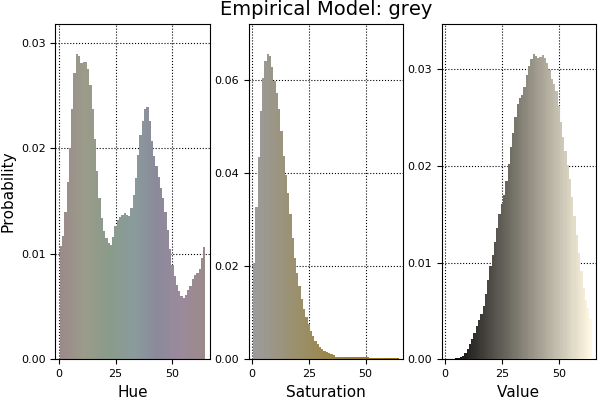


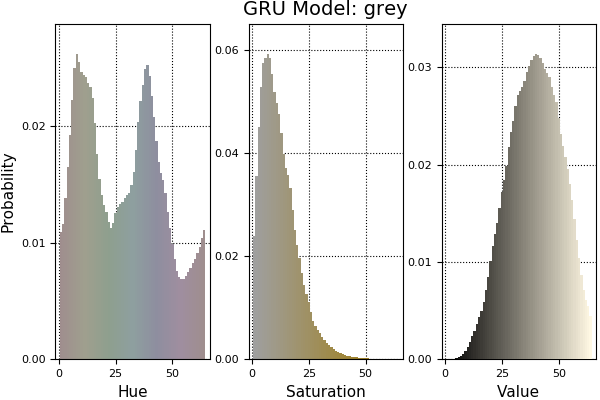

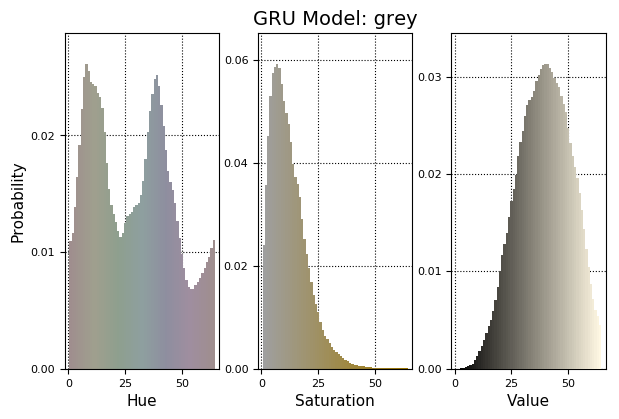

In [8]:
plot_hsv_both("grey")


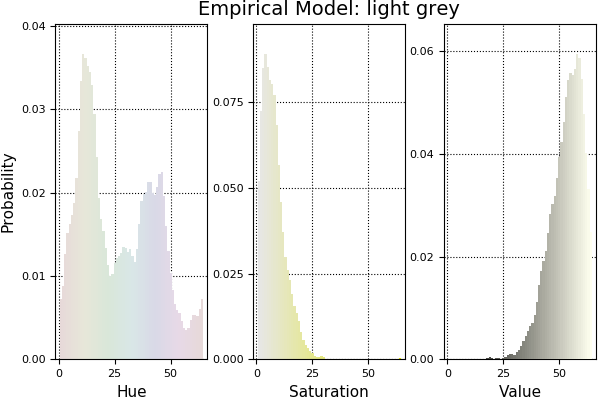

(h_max,s_max,v_max) = (0.171875,0.0625,0.90625)



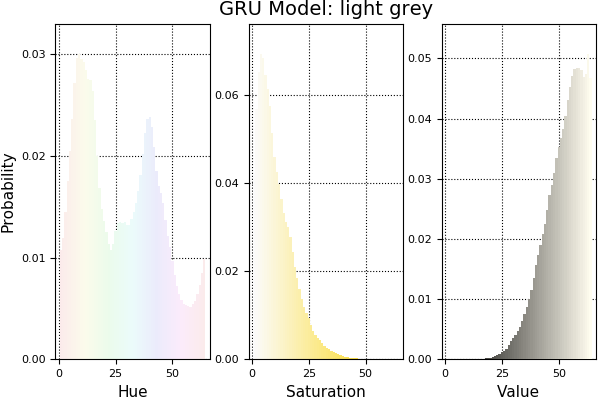

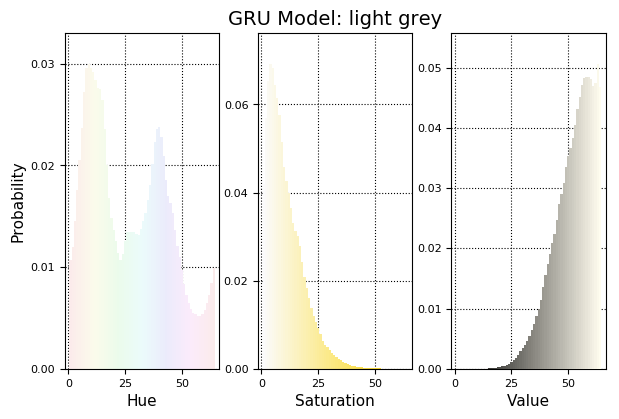

In [9]:
plot_hsv_both("light grey")


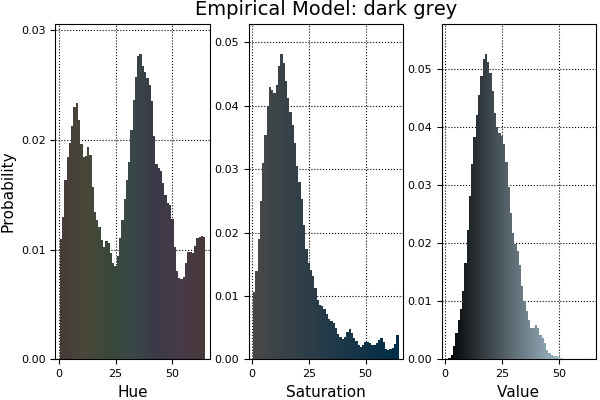

(h_max,s_max,v_max) = (0.5625,0.203125,0.28125)



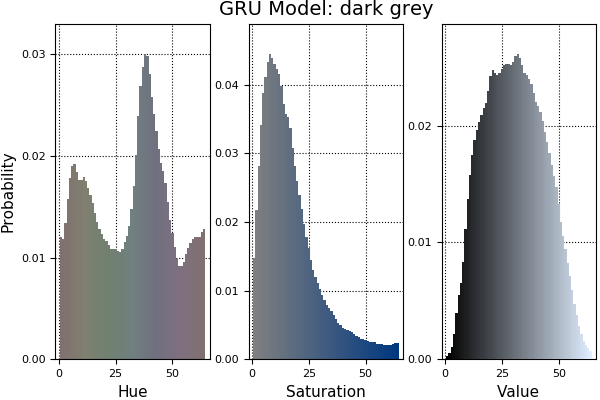

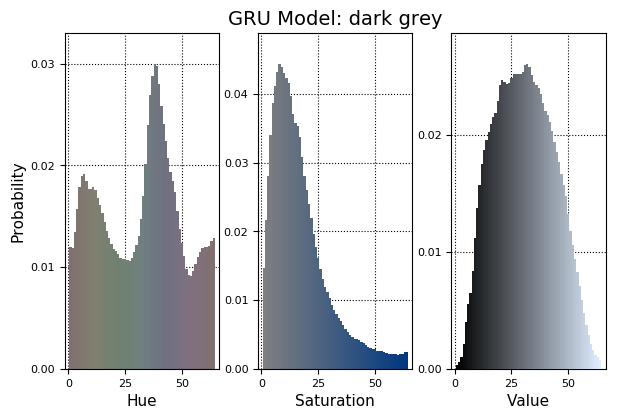

In [10]:
plot_hsv_both("dark grey")

No emprical data for very dark grey



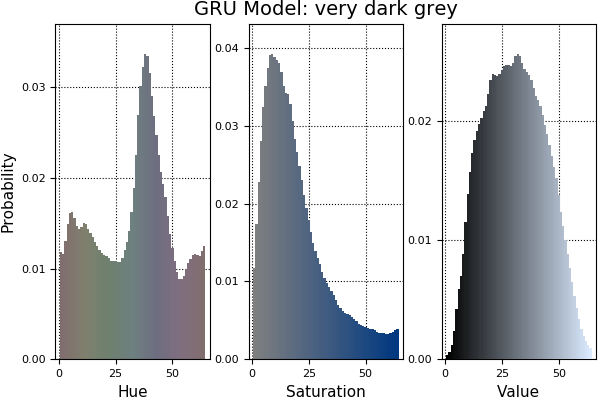

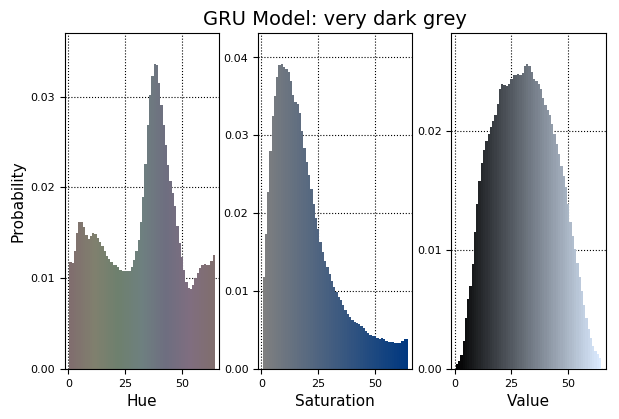

(h_max,s_max,v_max) = (0.59375,0.140625,0.5)


In [11]:
plot_hsv_both("very dark grey")


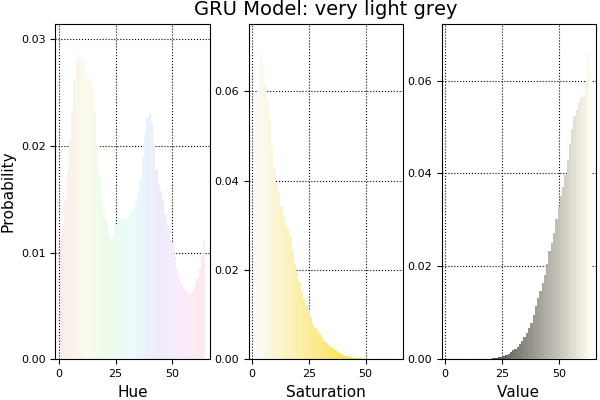

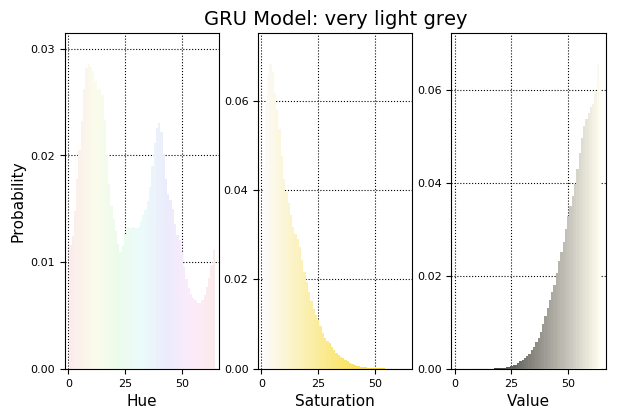

No emprical data for very light grey
(h_max,s_max,v_max) = (0.140625,0.0625,0.984375)


In [12]:
plot_hsv_both("very light grey")


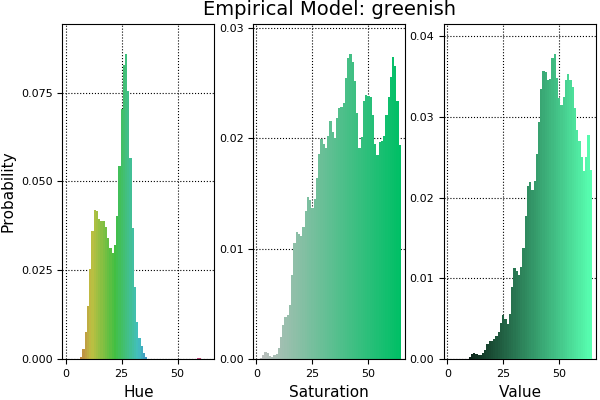

(h_max,s_max,v_max) = (0.421875,0.65625,0.75)



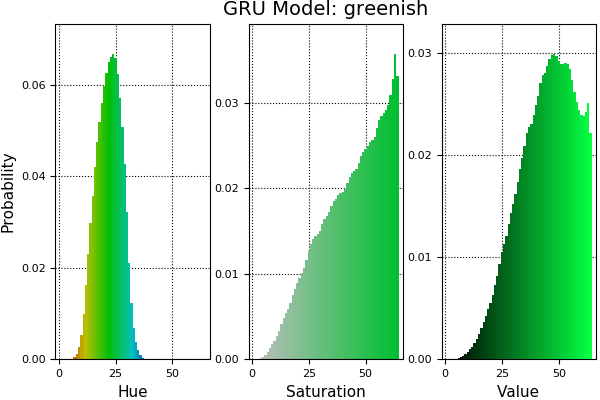

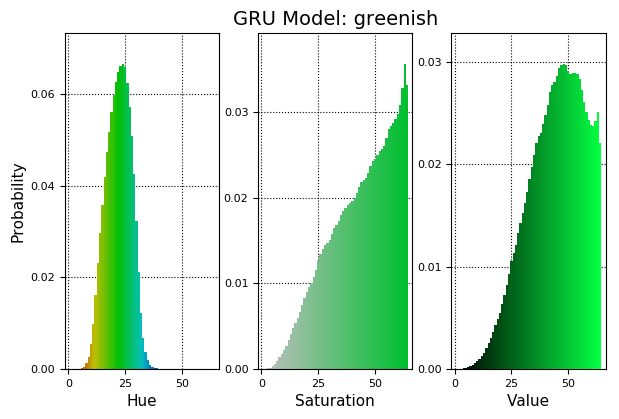

In [13]:
plot_hsv_both("greenish")


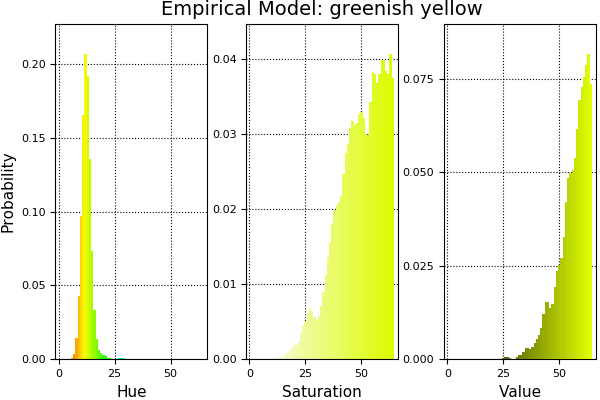

(h_max,s_max,v_max) = (0.1875,0.984375,0.984375)



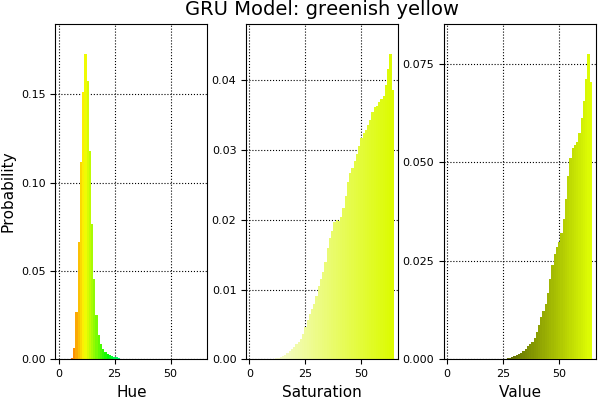

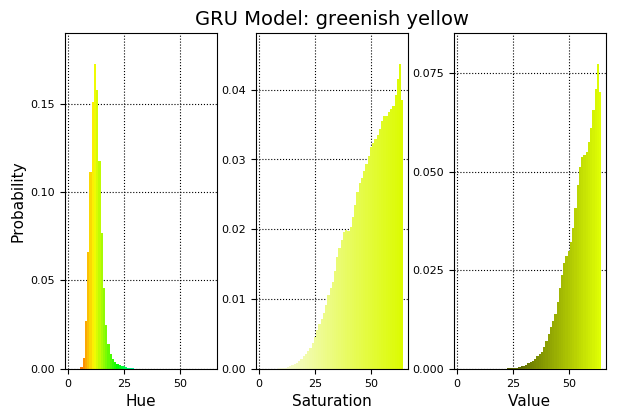

In [14]:
plot_hsv_both("greenish yellow")


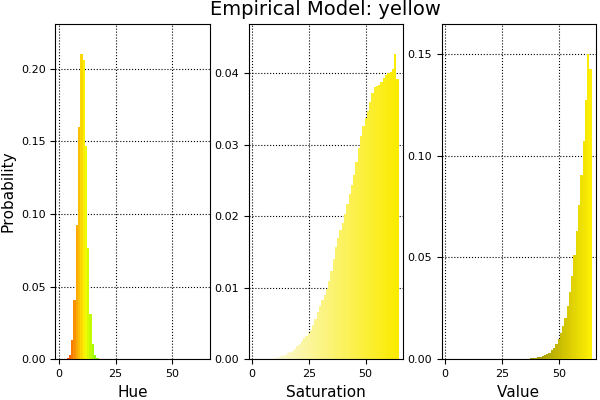

(h_max,s_max,v_max) = (0.15625,0.984375,0.984375)



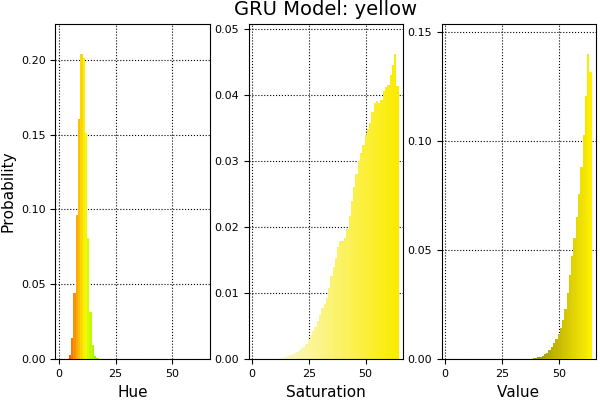

In [15]:
plot_hsv_both("yellow")


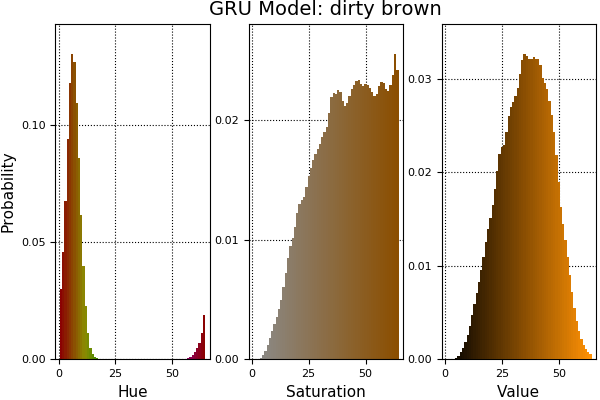

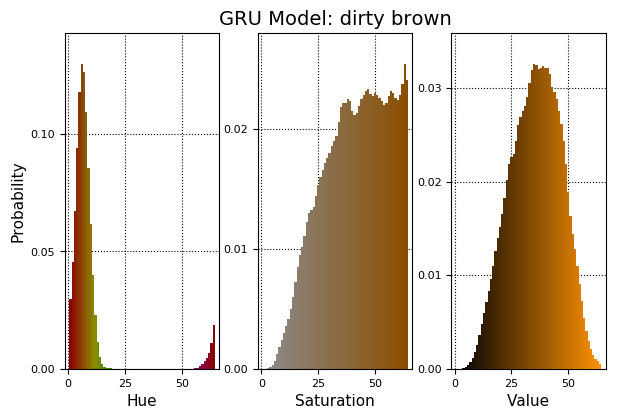

No emprical data for dirty brown
(h_max,s_max,v_max) = (0.09375,0.984375,0.546875)


In [16]:
plot_hsv_both("dirty brown")


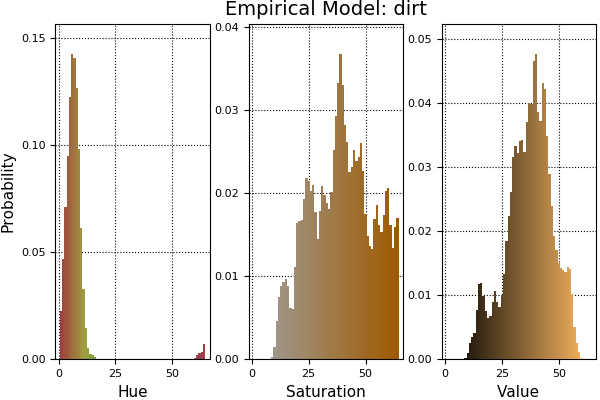

(h_max,s_max,v_max) = (0.09375,0.609375,0.625)



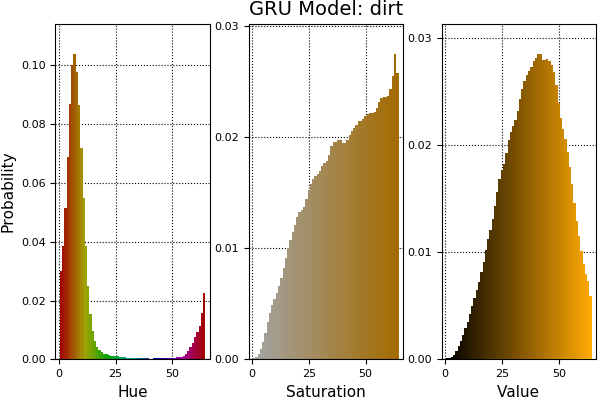

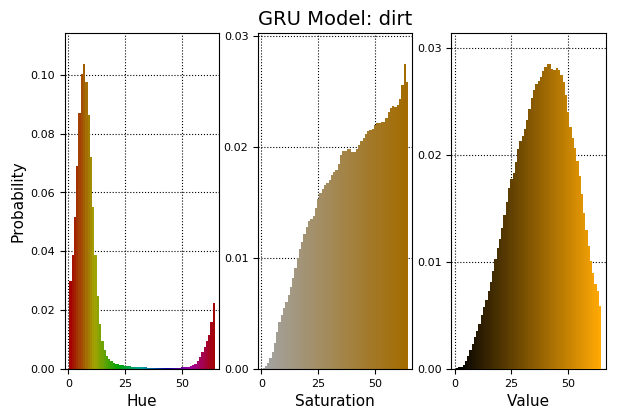

In [17]:
plot_hsv_both("dirt")

# Show how high resolution + Low blur does work out

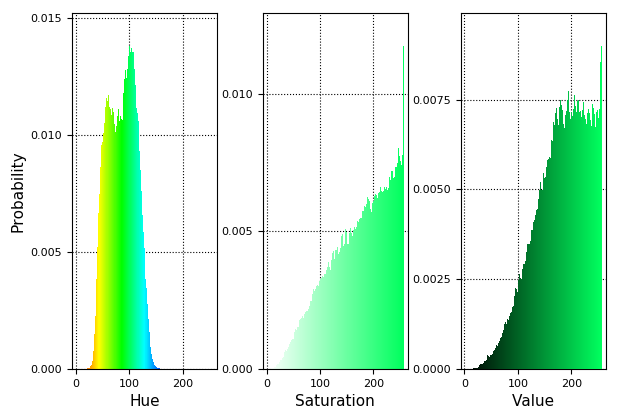

In [18]:
highres_lowblur_mdl = restore(TermToColorDistributionNetwork, "../models/highdim/sib0.125/params.jld")
plot_hsv(query(highres_lowblur_mdl, "greenish")...)
savefig("figs/highresgreenishlowblur.pdf")

# Full Performance


In [19]:
results_name = "dev_set_results" #Change this to TestSet results for doing on tests

"dev_set_results"

In [20]:
full_res=DataFrame(model=String[], resolution=Int[], perp=Float64[], mse_to_peak=Float64[], perp_sat=Float64[], perp_hue=Float64[], perp_val=Float64[])


,model,resolution,perp,mse_to_peak,perp_sat,perp_hue,perp_val
